# **Historical and Architectural Landmarks Recognizer**

The goal of this project is to classify 13 different Historical and Architectural Landmarks.The landmarks are:
* Angkor Wat (Cambodia)
* The Forbidden City (China)
* Taj Mahal (India)
* Cologne Cathedral (Germany)
* Petra (Jordan)
* Dome of the Rock (Jerusalem)
* Hagia Sophia (Istanbul, Turkey)
* Alhambra (Spain)
* Palace of Versailles (France)
* Colosseum (Italy)
* Great Pyramid of Giza (Egypt)
* Machu Picchu (Peru)
* Chichen Itza (Mexico)

# **Importing Necessary Libraries**

In [ ]:
%matplotlib inline
bs = 8 # batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev ddgs==9.5.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.5 MB/s eta 0:00:00


In [ ]:
pip install --upgrade duckduckgo-search

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *
import os
from ddgs import DDGS
import time
from tqdm.notebook import tqdm
import torch
from google.colab import drive

# **Mounting Drive and Setting Up Project Directory**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Defining the folder path**

In [ ]:
folder_path = '/content/drive/My Drive/Master_Course/Landmark Recognizer'

**Create the folder if it does not exists**

In [ ]:
os.makedirs(folder_path, exist_ok=True)

**Change to that directory**

In [ ]:
%cd '/content/drive/My Drive/Master_Course/Landmark Recognizer/'

/content/drive/My Drive/Master_Course/Landmark Recognizer


In [ ]:
#Check if the directory is correct
print(f"Current directory: {os.getcwd()}")

Current directory: /content/drive/My Drive/Master_Course/Landmark Recognizer


# **Download Images from Browser**

**Landmarks Labels**

In [ ]:
landmark_labels = {
    "angkor wat": [
        "Angkor Wat temple complex Cambodia UNESCO World Heritage",
        "Angkor Wat Khmer architecture Siem Reap"
    ],
    "forbidden city": [
        "Forbidden City imperial palace Beijing Ming dynasty",
        "Forbidden City Palace Museum Chinese architecture"
    ],
    "taj mahal": [
        "Taj Mahal mausoleum Agra India Mughal architecture",
        "Taj Mahal UNESCO World Heritage marble monument"
    ],
    "cologne cathedral": [
        "Cologne Cathedral Gothic architecture Germany UNESCO",
        "Cologne Cathedral Catholic Church"
    ],
    "petra jordan": [
        "Petra archaeological site Jordan Nabataean civilization",
        "Petra Jordan architecture UNESCO World Heritage"
    ],
    "dome of the rock": [
        "Dome of the Rock Jerusalem",
        "Dome of the Rock architecture"
    ],
    "hagia sophia": [
        "Hagia Sophia Istanbul architecture",
        "Hagia Sophia former cathedral mosque UNESCO"
    ],
    "alhambra palace": [
        "Alhambra palace fortress Granada Andalusia Spain",
        "Alhambra Islamic architecture Nasrid dynasty UNESCO"
    ],
    "palace of versailles": [
        "Palace of Versailles French baroque architecture UNESCO",
        "Palace of Versailles royal residence France"
    ],
    "colosseum rome": [
        "Colosseum Roman amphitheater Rome Italy UNESCO",
        "Flavian Amphitheatre ancient Roman architecture"
    ],
    "great pyramid of giza": [
        "Great Pyramid of Giza Egypt",
        "Pyramid of Khufu Fourth Dynasty Egypt UNESCO"
    ],
    "machu picchu": [
        "Machu Picchu Inca citadel Peru UNESCO World Heritage",
        "Machu Picchu archaeological site Andes mountains"
    ],
    "chichen itza": [
        "Chichen Itza Maya archaeological site Yucatan Mexico",
        "Chichen Itza pre-Columbian civilization UNESCO"
    ]
}

**Search DuckDuckGo Image**

In [ ]:
def search_images_ddg(terms, min_images=350):
  """
  term: term we are searching for
  min_images: minimum number of images to be downloaded
  """
  results = []
  ddgs = DDGS()
  for term in terms:
      for page_no in range(1, 50):
          responses = list(ddgs.images(
              query=term,
              region="us-en",
              safesearch="off",
              timelimit="y",
              max_results=min_images,
              page=page_no,
              backend="auto"
          ))
          results.extend(responses)
          if len(results) >= min_images:
              break
      if len(results) >= min_images:
          break
  image_urls = [result['image'] for result in results]
  return image_urls

In [ ]:
data_path="data"

if not os.path.exists(data_path):
  os.mkdir(data_path)

for landmark,query in tqdm(landmark_labels.items()):
  dest = f"{data_path}/{landmark}"
  if not os.path.exists(dest):
      os.mkdir(dest)

  try:
      landmark_image_urls = search_images_ddg(query)
      download_images(dest, urls=landmark_image_urls)
  except Exception as e:
      print(f"Error downloading images for {landmark}: {str(e)}")
      continue



  0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#4059) [Path('data/forbidden city/85a4db89-ed1f-4551-b709-99063c7888a5.jpg'),Path('data/forbidden city/2355b1dd-223f-4b3f-970c-764e9682923e.jpg'),Path('data/forbidden city/3f4b86f5-2423-4d56-8690-24582162dc4d.jpg'),Path('data/forbidden city/1ce165cf-0247-4ff0-a4ab-9ecd779c1fad.jpg'),Path('data/forbidden city/885a210d-8019-4abd-a443-559d77ae748a.jpg'),Path('data/forbidden city/a91ce7a4-cc66-498d-8706-c117d3c3202c.jpg'),Path('data/forbidden city/9bfea9c1-ddc1-474d-ae87-2d6b84216f63.jpg'),Path('data/forbidden city/dc7a31b6-49c0-403f-8027-4887e6995887.jpg'),Path('data/forbidden city/1448b7cb-67d6-4c03-aefe-4b167d52ab05.jpg'),Path('data/forbidden city/4f256db2-d2d7-4563-a824-8a7fb20fbaa2.jpg'),Path('data/forbidden city/0c993f16-11a8-4fa5-95e4-c34d0ae6daa0.jpg'),Path('data/forbidden city/8f52d42e-5072-4ee7-a124-88aa014565de.jpg'),Path('data/forbidden city/b3f1b9ca-6d30-4945-b306-4cf86bffdb3e.jpg'),Path('data/forbidden city/6bceb11b-1e43-4c1f-96f7-66a12eee1091.jpg'),Path('data/forbidden city

In [ ]:
failed = verify_images(image_counts)
failed

(#14) [Path('data/hagia sophia/3fd94d4a-3e1b-4ebb-811a-aecb5fc96bda.jpg'),Path('data/hagia sophia/c6e094ad-da97-4aba-a111-20b3aa6c0ddd.jpg'),Path('data/hagia sophia/fcf12e4d-f758-4181-bd29-581bea6c2851.jpg'),Path('data/hagia sophia/d1a277a8-ced6-4155-8a39-ff2b5b91e166.jpg'),Path('data/hagia sophia/d452e5a4-dae9-4974-b5ed-0c6fbb16944f.jpg'),Path('data/hagia sophia/aeb0b166-6853-4e60-9e8b-86057b58189e.jpg'),Path('data/hagia sophia/dbf53f00-20ab-45f0-8b99-f51b3a670ce8.jpg'),Path('data/hagia sophia/9de5ae79-3065-4f1e-b727-80934dbb2f18.jpg'),Path('data/hagia sophia/92e8ebbb-39c7-41db-ae42-4052f3f2663a.jpg'),Path('data/great pyramid of giza/16c7d682-3dfd-4fe7-aae7-8453c7e81807.jpg'),Path('data/great pyramid of giza/fe7a70c0-30c0-4054-82d3-f2b57fa000bd.jpg'),Path('data/great pyramid of giza/89375652-2344-4c16-9e04-1f42fdd73f9a.jpg'),Path('data/great pyramid of giza/6911c2db-2a7f-464d-954a-037713459959.jpg'),Path('data/great pyramid of giza/ed164377-52a8-4307-bbee-5721d7309115.jpg')]

In [ ]:
failed.map(Path.unlink)

(#14) [None,None,None,None,None,None,None,None,None,None,None,None,None,None]

# **Data to Dataloaders**

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)

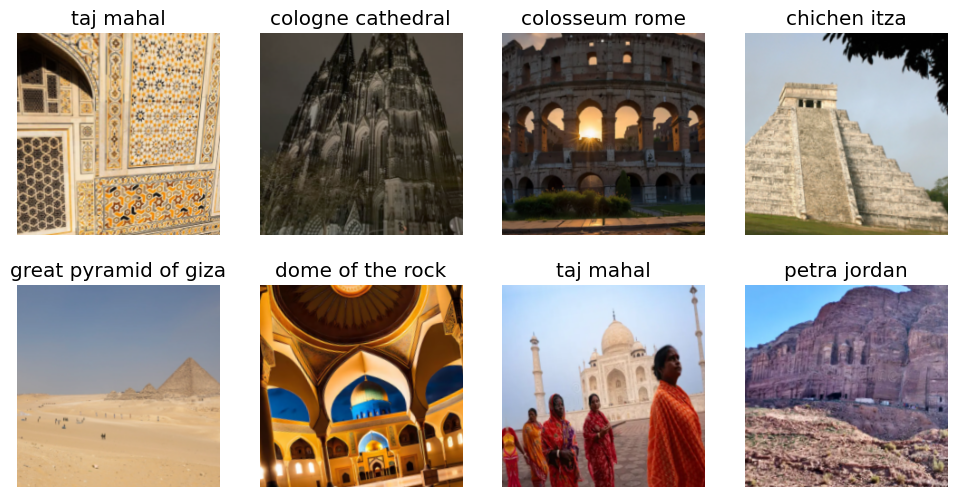

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

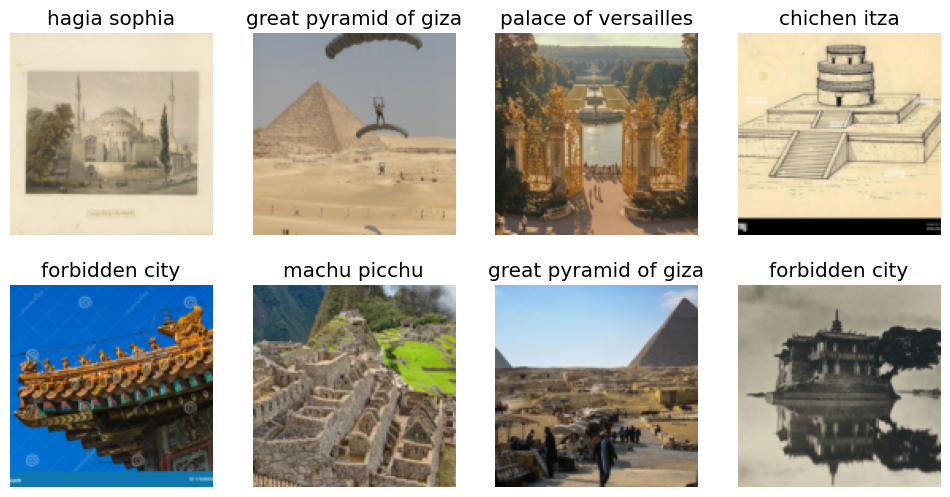

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

# **Data Augmentation**

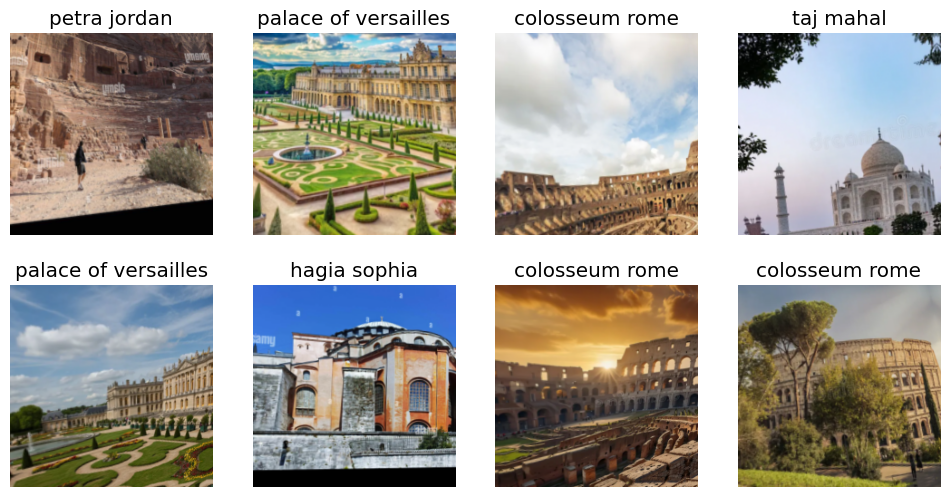

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)